## Linear Harmonic Oscillator:

In [9]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

Defining Constant:

In [10]:
levels = int(input('Enter the number of states: ')) # Amount of excited states shown
rmin,rmax = -0.4,0.4; # Position of wall along x-axis
n=500 # no. of points

r = np.linspace(rmin,rmax,n)  # n numbers b/w rmin and rmax 
d = r[1]-r[0]

In [11]:
# Given variable values in e.v.*Armstrong units
h_cross = 1973 # Planck's constant cross
h = (2*np.pi)*h_cross # Planck's constant
m = 0.511e6 # Mass of the electron
e = 1 # Electronic charge

k = 0.005*e # Spring constant
omega = 1 # angular constant

Potential and Kinetic Energy Matrix

In [12]:
# Kinetic Energy
A = (-2)*np.eye(n)
for i in range(n-1):
  A[i+1,i] = A[i,i+1] = 1
K = (-(h_cross**2)/(2*m*d**2))*A

# Potential Energy
V = np.zeros((n,n))
for i in range(n):
  V[i,i] = 1/2*(k+m*omega**2)*(r[i]**2)

# Hamiltonian Matrix
H = K+V

In [13]:
# Finding Eigenvalues and Eigenvectors
E,X = sci.linalg.eig(H)
E = E.real ; X = X.real

# Sort eigenvalues and eigenvectors
idx = E.argsort()
E = E[idx]
X = X[:, idx]

# Probability density matrix
P = X**2

Displaying Results

In [14]:
print("Using Matrix:")
for j in range(levels):
  print(f'{j} state energy:- {E[j]/e:.4f} eV')
print("\nUsing Formula:")
for j in range(levels):
  energy = (j+1/2)*h_cross*omega
  print(f'{j} state energy:- {energy/e:.4f} eV')

Using Matrix:
0 state energy:- 986.4590 eV
1 state energy:- 2959.2948 eV

Using Formula:
0 state energy:- 986.5000 eV
1 state energy:- 2959.5000 eV


Plotting wavefunctions:

<Figure size 600x400 with 0 Axes>

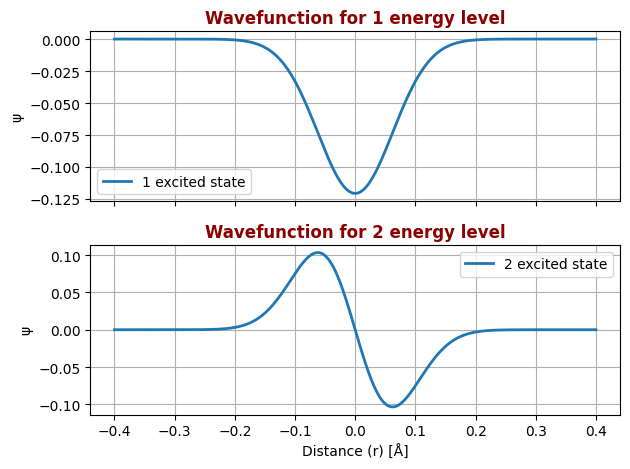

In [15]:
# Plotting wavefunctions
plt.figure(1, figsize=(3*levels, 2*levels))
fig, ax = plt.subplots(levels, 1, sharex=True)
for i in range(levels):
  ax[i].plot(r, X[:, i], linewidth=2)
  ax[i].set_ylabel('ψ')
  ax[i].set_title(f'Wavefunction for {i + 1} energy level', fontsize=12,fontweight=750, color='darkred',pad=6)
  ax[i].legend([f'{i + 1} excited state'])
  ax[i].grid(True)
ax[levels - 1].set_xlabel('Distance (r) [Å]')

plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

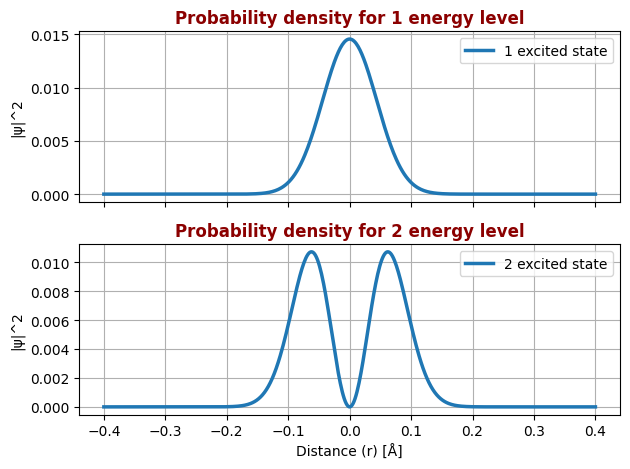

In [16]:
# Plotting probability density
plt.figure(2, figsize=(3*levels, 2*levels))
fig,ax = plt.subplots(levels,1,sharex=True)
for i in range(levels):
  ax[i].plot(r, P[:, i],linewidth=2.5)
  ax[i].set_ylabel('|ψ|^2')
  ax[i].set_title(f'Probability density for {i + 1} energy level', fontsize=12,fontweight=750, color='darkred',pad=6)
  ax[i].legend([f'{i + 1} excited state'])
  ax[i].grid(True)
ax[levels-1].set_xlabel('Distance (r) [Å]')

plt.tight_layout()
plt.show()